In [25]:
#Import requests to extract content from a url
import requests
#Beautifulsoupis for web screapping used t scrap specific content
from bs4 import BeautifulSoup as bs
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import pandas as pd
import nltk
import tweepy

In [79]:
Elon_musk= pd.read_csv('C:/Users\DELL 5459/Downloads/excelr/Assignment/11 Text Mining/Elon_musk.csv', encoding= 'ISO-8859-1')
Elon_musk

,No,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [80]:
em_df= Elon_musk.drop('No', axis=1)

In [81]:
em_df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


## Cleaning the data

In [82]:
# Create a function to clean the tweets
def cleanText(text):
    text=re.sub(r'@[A-Za-z0-9]+', '', text) #Removed @
    text=re.sub(r'#', '',text) #Remove #
    text=re.sub(r'RT[\s]+', '', text) # Remove RT
    text=re.sub(r'https?:\/\/\S+', '', text) # Remove hyper link
    text=re.sub("[0-9" "]+"," ",text)
    text=re.sub(r'[^a-zA-Z\s]', '', text) #remove special characters/emojis
    return text

In [83]:
# Clean Text
em_df['Text']=em_df['Text'].apply(cleanText)


In [84]:
em_df.head()

,Text
0,Im an alien
1,AACarmack Ray tracing on Cyberpunk with HDR is...
2,Great interview
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...


In [85]:
# Create a function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [86]:
# Create new column
em_df['Polarity Score']= em_df['Text'].apply(getPolarity)

In [87]:
em_df

,Text,Polarity Score
0,Im an alien,-0.250000
1,AACarmack Ray tracing on Cyberpunk with HDR is...,0.000000
2,Great interview,0.800000
3,Doge is underestimated,0.000000
4,Congratulations Tesla China for amazing execu...,0.275000
...,...,...
1994,True it sounds so surreal but the negative pr...,0.111111
1995,Make sure to read ur terms amp conditions bef...,0.500000
1996,Samwise Gamgee,0.000000
1997,Altho Dumb and Dumber is U F U F,-0.375000


## Rule based approach

## Word Cloud

<function matplotlib.pyplot.show(close=None, block=None)>

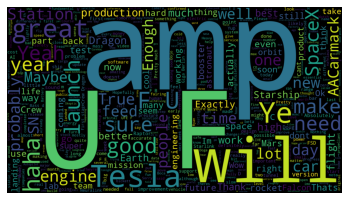

In [89]:
allwords= ' '.join([twts for twts in em_df['Text']])

wordcloud_em = WordCloud(background_color='black',
                        max_words= 500, width=1800, 
                        height=1000).generate(allwords)
plt.imshow(wordcloud_em)
plt.axis('off')
plt.show

In [101]:
# Create a Function to compute the negative, neutral and possitive analysis

def get_sentiment(score):
    if score<0: 
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
em_df['Analysis'] = em_df['Polarity Score'].apply(get_sentiment)

In [102]:
em_df

,Text,Polarity Score,Analysis
0,Im an alien,-0.250000,Negative
1,AACarmack Ray tracing on Cyberpunk with HDR is...,0.000000,Neutral
2,Great interview,0.800000,Positive
3,Doge is underestimated,0.000000,Neutral
4,Congratulations Tesla China for amazing execu...,0.275000,Positive
...,...,...,...
1994,True it sounds so surreal but the negative pr...,0.111111,Positive
1995,Make sure to read ur terms amp conditions bef...,0.500000,Positive
1996,Samwise Gamgee,0.000000,Neutral
1997,Altho Dumb and Dumber is U F U F,-0.375000,Negative


In [103]:
# Print all the positive text

j=1
sortedDF = em_df.sort_values(by=['Polarity Score'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]== 'Positive'):
        
        print(str(j)+ ')' +sortedDF['Text'][i])
        print()
        j = j+1

1)  Great interview

2) Congratulations Tesla China for amazing execution last year Now on to the next for even more

3)Happy New Year of the Ox 

4)   Haha thanks 

5)The most entertaining outcome is the most likely

6)  Its getting real

7) He definitely has issues but the sentencing seems a bit high

8) Thanks for fixing

9)This is true power haha 

10) NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission 

11)   Once we can predict cash flow reasonably well Starlink will IPO

12)  Does seem a bit high

13)  Wow

14)    So cute U F 

15) Extremely misleading image as doesnt reflect true time cost to people or rain amp pain

16) Its the most fun crypto

17) True

18)  Not that easy This is two decades of intense work Have to look at old notes emails texts

19) Have you read  Its great

20) Sure

21)The great thing about restaurants is that you get to hang out with strangers  SJM

22)Much wow

23) bickett   That said the ship la

679) Humans are swiftly becoming a small percentage of total compute

680)Bass d    Very impressive render Note legs will be bigger amp there 

681)sci Also there could be long period comets that intersect Earth right now We just havent observed the 

682)sci Pretty much

683)  Wow

684) Thats a great one

685) Bold move sir bold move

686)   Thank you Tesla is most honored

687)  Very real possibility

688)History is written by the victors  except on Wikipedia haha

689) Yes Probably more accurate to say Great Filters plural

690)We must pass The Great Filter

691)Sounds right 

692)A truly useful exaflop at de facto FP 

693) feed Metal has a fudgelike consistency near its melting point so you can just smoosh it together

694)Enough   Your insights over the years have been excellent Thats approximately right

695) Absolutely but it doesnt seem that govt can move fast enough

696) Ok

697) It will blow ur mind haha 

698)Our main engineering locations are Palo Alto Austin amp Seatt

In [104]:
# Print all the Negative Text

j=1
sortedDF = em_df.sort_values(by=['Polarity Score'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]== 'Negative'):
        
        print(str(j)+ ')' +sortedDF['Text'][i])
        print()
        j = j+1

1) Im an alien

2) Your app sucks

3)  Starlink is a staggeringly difficult technical amp economic endeavor However if we don 

4)  SpaceX needs to pass through a deep chasm of negative cash flow over the next year or 

5) Everyone at Tesla receives stock 

My comp is all stockoptions which I do not take off the table 

Thats what youre missing

6) Doge appears to be inflationary but is not meaningfully so fixed  of coins per unit time whereas 

7)  It was foolish of us not to start   engines amp immediately shut down   as   are needed to land

8) We were too dumb

9)This was a tough one 

10) This mission enables access for everyday people who dream of going to space

11)feed Earth is small amp we are smaller still 

12) Ryan A little

13) TeslaNews  Yeah probably in a few months

14) After you drive without using a PRND stalkstick for a few days it gets very annoying to go back amp use a shifter

15) No more stalks Car guesses drive direction based on what obstacles it sees contex

In [107]:
# Print all the Neutral Text

j=1
sortedDF =em_df.sort_values(by=['Polarity Score'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Neutral'):
    
        print(str(j)+ ')' +sortedDF['Text'][i])
        print()
        j= j+1

1)AACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it

2) Doge is underestimated

3)Frodo was the underdoge
All thought he would fail
Himself most of all 

4)  Indeed Tweets definitely do not represent realworld time allocation

5) Just sent some

6)Just agree to do Clubhouse with 

7)

8)Bought some Dogecoin for lil X so he can be a toddler hodler

9) Please unlock my account

10) U F U F 

11) Any crypto wallet that wont give you your private keys should be avoided at all costs

12) Yes

13)AACarmack Lowest cost per ton of carbon sequestered net of value of any product made 

Must be scalable to g 

14) Its meant to be the same price in all countries Only difference should be taxes amp shipping

15) This is intended for Earth but there may be some ideas that apply to Mars too

16)   ZPalmer U F U F 

17)XPrize team will manage the  M carbon capture prize 

18)Back to work I go 

19)    Orbital launch tower that can stack
  Enough Raptors for orbit booster
  I

693)sci Asteroid impact risk is well understood but not comets Those worry me

694)  Yup

695) This is what I meant by  D 

696) The FSD improvement will come as a quantum leap because its a fundamental architectural rewrite 

697)Tesla is developing a NN training computer called Dojo to process truly vast amounts of video data Its a beast P 

698)  What are the odds  

699) Psyche 

700)        Yes integrated with the tip of the nose

701)        Starship fairing wil 

702)   You are correct This is a substantial underpayment compared to what ULA has received

703) So why is this madness acceptable for BoeingLockheed rockets

704) Efficiently reusable rockets are all that matter for making life multiplanetary amp space power Becau 

705) No surprise

706) Same hex tiles slightly different mounting method Need bigger sections of tiles to see how they hold up 

707)Goldberg  One day soon I will wear this outfit 

708)Goldberg  I was trying to channel Herb Tarlek from WKRP 

709) T

In [109]:
ptexts=em_df[em_df.Analysis == 'Positive']
ptexts=ptexts['Text']

round( (ptexts.shape[0] / em_df.shape[0]) * 100, 1)

44.1

In [111]:
ptexts = em_df[em_df.Analysis == 'Negative']
ptexts = ptexts['Text']

round( (ptexts.shape[0] /em_df.shape[0]) * 100, 1)

11.4

In [112]:
ptexts = em_df[em_df.Analysis == 'Neutral']
ptexts = ptexts['Text']
round( (ptexts.shape[0] / em_df.shape[0]) * 100, 1)

44.5

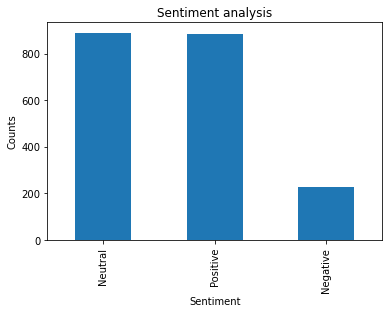

In [113]:
# Show the value counts

em_df['Analysis'].value_counts()

# plot and visualise theee counts
plt.title('Sentiment analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
em_df['Analysis'].value_counts().plot(kind='bar')
plt.show()